## 실루엣 분석

* 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타낸다.
* 실루엣 분석은 개별 데이터가 가지는 군집화 지표인 실루엣 계수를 기반으로 합니다. 
* 개별 데이터가 가지는 실루엣 계수는 해당데이터가 같은 굽집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 굽집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표이다.
* aij는 i번째 데이터에서 자신이 속한 클러스터내의 다른 데이터 포인트까지의 거리
* 실루엣 계수는 -1보다 크거나 같고 1보다 작거나 같다. (1에 가까울 수록 잘된 것)


##### sklearn.metrics.silhouette_samples(X,labels,metrics='euclidean',**kwds)
    각 데이터 포인트의 실루엣 계수를 계산해 반환합니다.

##### sklearn.metrics.silhouette_score(X,labels,metric='euclidean',sample_size=None,**kwds)
    * 1~1사이의 값 1에 가까울 수록 좋은 것
    전체 데이터의 실루엣 계수 값을 평균해 반환합니다.
    * 개별 군집의 평균값의 편차가 크지 않아야한다.
    * 실루엣 스코어가 좋다고 해서 군집이 잘 된 것이 아님.

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 metric값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


In [3]:
iris=load_iris()

feature_names=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(data=iris.data,columns=feature_names)

# kmeans 군집화 수행
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(irisDF)
# 데이터당 클러스터값 할당
irisDF['cluster']=kmeans.labels_

print(irisDF.shape)
irisDF.head()


(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [4]:
# iris의 모든 개별 데이터에 실루엣 계수값을 구함.
score_samples=silhouette_samples(iris.data,irisDF['cluster'])
print('silhoutte_samples() return 값의 shape',score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff']=score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함.
average_score=silhouette_score(iris.data,irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(15)

silhoutte_samples() return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302
5,5.4,3.9,1.7,0.4,1,0.748280
6,4.6,3.4,1.4,0.3,1,0.821651
7,5.0,3.4,1.5,0.2,1,0.853905
8,4.4,2.9,1.4,0.2,1,0.752150
9,4.9,3.1,1.5,0.1,1,0.825294


<AxesSubplot:>

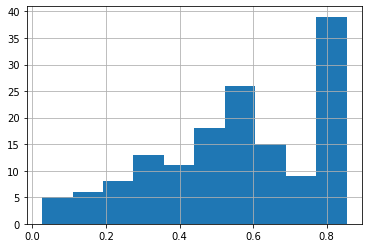

In [5]:
irisDF['silhouette_coeff'].hist()

In [25]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists,X_features):
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples,silhouette_score
    
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols=len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig,axs= plt.subplots(figsize=(4*n_cols,4),nrows=1,ncols=n_cols)

# 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):


        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer=KMeans(n_clusters=n_cluster,max_iter=500,random_state=0)
        cluster_labels=clusterer.fit_predict(X_features)
    
        sil_avg= silhouette_score(X_features,cluster_labels)
        sil_values= silhouette_samples(X_features,cluster_labels)
    
        y_lower=10
        axs[ind].set_title('Number of Cluster :'+ str(n_cluster)+'Silhouette_score :' + str(round(sil_avg,3)))
        axs[ind].set_xlabel('The silhouette coefficient values')
        axs[ind].set_ylabel('Cluster label')
        axs[ind].set_xlim([-0.1,1])
        axs[ind].set_ylim([0,len(X_features)+(n_cluster+1)*10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0,0.2,0.4,0.6,0.8,1])
    
        # 클러스터링 갯수별로 fill_betweenx()형태의 막대 그래프 표현.
    
        for i in range(n_cluster):
            ith_cluster_sil_values=sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
        
            size_cluster_i= ith_cluster_sil_values.shape[0]
            y_upper= y_lower + size_cluster_i
        
            color= cm.nipy_spectral(float(i)/n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_sil_values,\
                facecolor=color,edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05,y_lower+0.5*size_cluster_i,str(i))
            y_lower=y_upper+10
            
        axs[ind].axvline(x=sil_avg,color='red',linestyle='--')

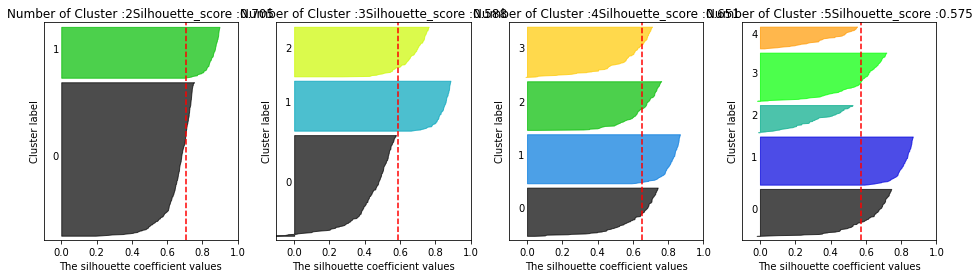

In [26]:
# make_blobs을 통해 clustering을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=500,n_features=2,centers=4,cluster_std=1,
               center_box=(-10.0,10.0),shuffle=True,random_state=1)
#cluster 개수를 2개,3개 ,4개,5개 일때의 클러스터별 실루엣 개수 평균값을 시각화
visualize_silhouette([2,3,4,5],X)


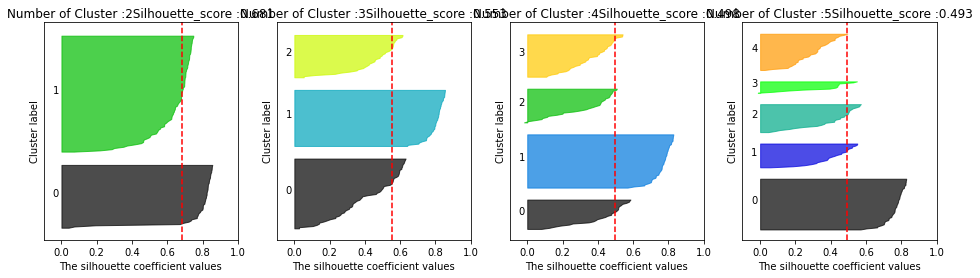

In [27]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([2,3,4,5],iris.data)